In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import math

In [2]:
#Disable SettingsSettingWithCopyWarning:  A value is trying to be set on a copy of a slice from a DataFrame
pd.options.mode.chained_assignment = None  # default='warn'

df = pd.read_csv('cleaned_data.csv', index_col=0)
df


,serie,cpu_manufacturer,core,cpu_frequency,cpu_series,memory_size,memory_type,RAM,resolution,matrix_type,videocard,weight,laptop_class,prices
0,Asus TUF Gaming F15,Intel,6.0,2.6,Intel Core i5,512.0,SSD,16.0,1920x1080 Full HD,IPS,NGF RTX3050,2.30,Gaming,579990
1,Huawei HUAWEI MateBook D15,Intel,2.0,3.0,Intel Core i3,256.0,SSD,8.0,1920x1080 Full HD,IPS,Integrated,1.62,Non-gaming,299990
2,Asus X515JA,Intel,4.0,1.0,Intel Core i5,512.0,SSD,8.0,1920x1080 Full HD,IPS,Integrated,1.80,Non-gaming,299990
3,Asus X515JA,Intel,2.0,1.2,Intel Core i3,256.0,SSD,8.0,1920x1080 Full HD,IPS,Integrated,1.80,Non-gaming,219990
4,Asus TUF Gaming F15,Intel,4.0,2.5,Intel Core i5,512.0,SSD,16.0,1920x1080 Full HD,IPS,NGF GTX 1650,2.30,Gaming,489990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Gigabyte U4 UD,Intel,4.0,2.5,Intel Core i7,512.0,SSD,16.0,1920x1080 Full HD,IPS,Integrated,1.00,Non-gaming,476390
93,Gigabyte AERO 16 KE5,Intel,14.0,2.3,Intel Core i7,1000.0,SSD,16.0,3840x2400 WQUXGA,IPS,NGF RTX 3060,1.80,Gaming,1317890
94,Gigabyte G7 KE,Intel,6.0,2.5,Intel Core i5,512.0,SSD,16.0,1920x1080 Full HD,IPS,NGF RTX 3060P,2.40,Gaming,649490
95,Gigabyte G7 KE,Intel,12.0,2.5,Intel Core i5,512.0,SSD,16.0,1920x1080 Full HD,IPS,NGF RTX 3060P,2.40,Gaming,719490


In [3]:
#We have a lot of categorical variables like in cpu_manufacturer, cpu_series, memory type
# Resolution, matrix_type6 videocard

#We will use KNN algorithm for classification and we will need 2 features

#Let's take features like videocard and core numbers

#First we need to change categorical variables to numeric

from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()
le = LabelEncoder()

# df['name'] = le.fit_transform(df['name'].values)
df_copy['videocard'] = le.fit_transform(df['videocard'].values)
df_copy['cpu_manufacturer'] = le.fit_transform(df['cpu_manufacturer'].values)
df_copy['cpu_series'] = le.fit_transform(df['cpu_series'].values)
df_copy['memory_type'] = le.fit_transform(df['memory_type'].values)
df_copy['resolution'] = le.fit_transform(df['resolution'].values)
df_copy['matrix_type'] = le.fit_transform(df['matrix_type'].values)

In [6]:

def make_classification(features_1, features_2, show_plot, df_):
    
    features_df = df_[[features_1, features_2, 'laptop_class']]
    
    if show_plot == True:
        features_df.plot(kind='scatter', x=features_1, y=features_2, s=30)
        plt.show()
    
        sns.FacetGrid(features_df, hue="laptop_class", height=5).map(plt.scatter, features_1, features_2).add_legend()
        plt.show()
    
    #Splitting our data for testing and training

    #For X values we don't need a species, because it is an answer
    X = features_df.iloc[:, 0:2]


    #For y we need only answers
    y = features_df.iloc[:, 2]
    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    stand_Sc = StandardScaler()
    X_train = stand_Sc.fit_transform(X_train)
    X_test = stand_Sc.transform(X_test)
    
    root = round(math.sqrt(len(y_test)))
    if root % 2 == 0:
        root += 1
    
    classifier = KNeighborsClassifier(n_neighbors=root, p=2, metric='euclidean')
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    fraction = accuracy_score(y_test, y_pred)
    if show_plot == True:
        print('Number of test cases:', len(y_test))
        print('Number of correct answers:', accuracy_score(y_test, y_pred, normalize=False))

        print('Fraction:', fraction)
    
    return fraction

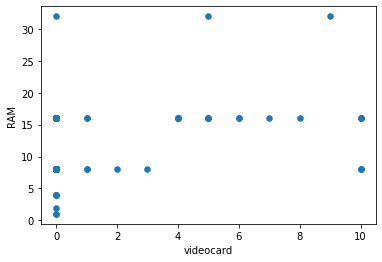

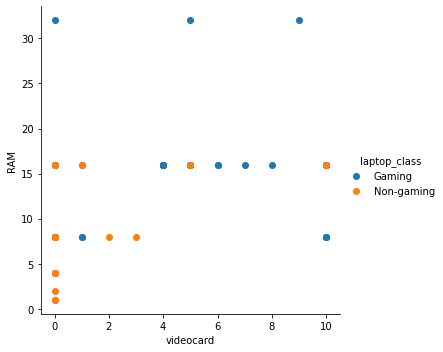

Number of test cases: 30
Number of correct answers: 23
Fraction: 0.7666666666666667


0.7666666666666667

In [9]:
make_classification('videocard', 'RAM', True, df_copy)

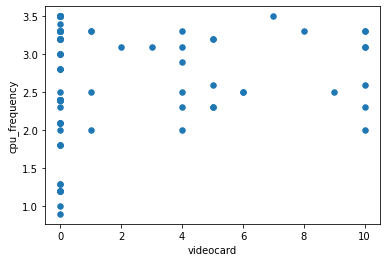

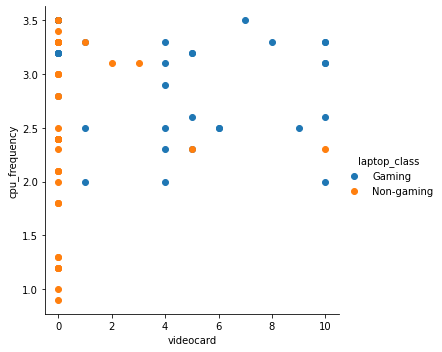

Number of test cases: 30
Number of correct answers: 29
Fraction: 0.9666666666666667


0.9666666666666667

In [10]:
make_classification('videocard', 'cpu_frequency', True, df_copy)

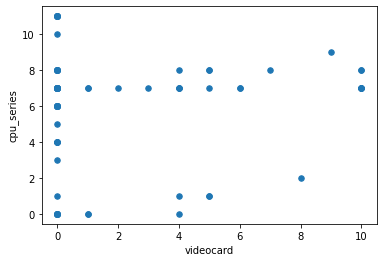

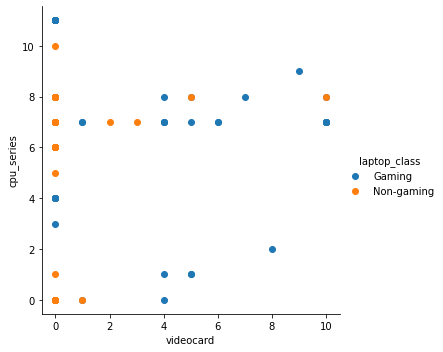

Number of test cases: 30
Number of correct answers: 27
Fraction: 0.9


0.9

In [11]:
make_classification('videocard', 'cpu_series', True, df_copy)

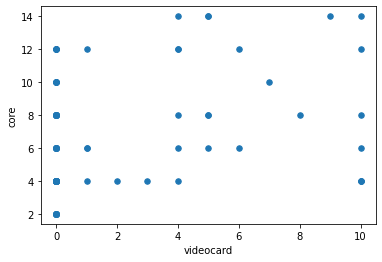

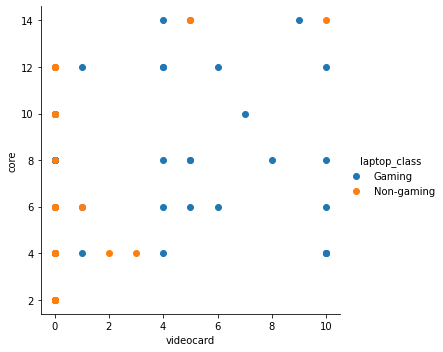

Number of test cases: 30
Number of correct answers: 27
Fraction: 0.9


0.9

In [12]:
make_classification('videocard', 'core', True, df_copy)

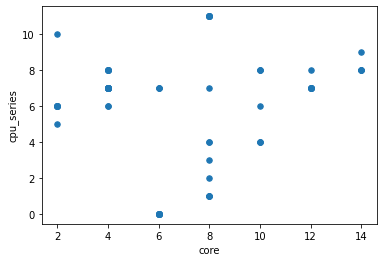

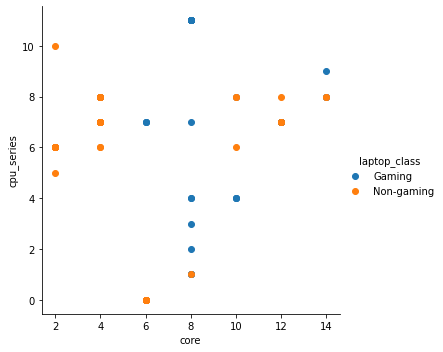

Number of test cases: 30
Number of correct answers: 21
Fraction: 0.7


0.7

In [13]:
make_classification('core', 'cpu_series', True, df_copy)

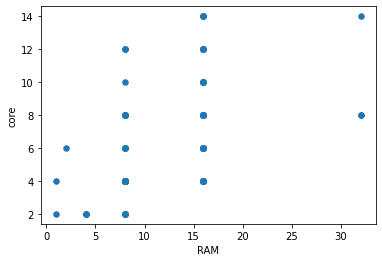

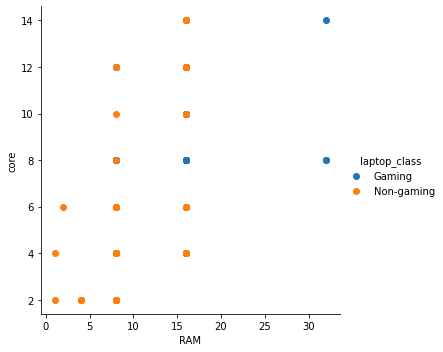

Number of test cases: 30
Number of correct answers: 21
Fraction: 0.7


0.7

In [15]:
make_classification('RAM', 'core', True, df_copy)

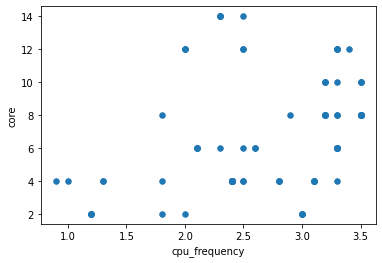

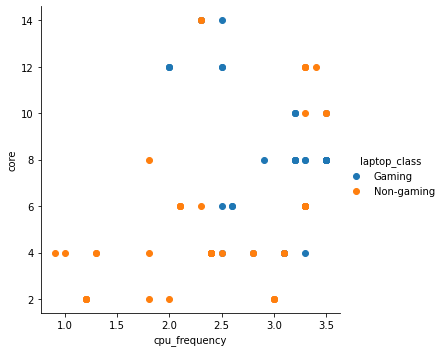

Number of test cases: 30
Number of correct answers: 23
Fraction: 0.7666666666666667


0.7666666666666667

In [16]:
#Let's now take number of classifications and find average
make_classification('cpu_frequency', 'core', True, df_copy)

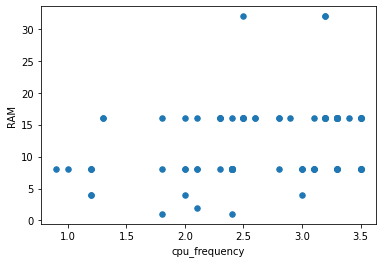

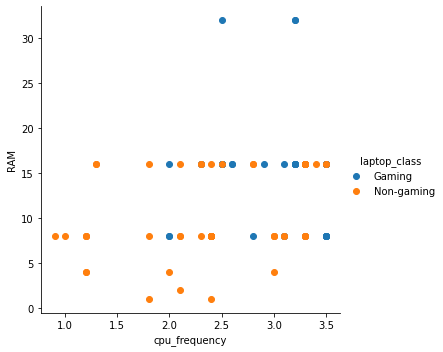

Number of test cases: 30
Number of correct answers: 23
Fraction: 0.7666666666666667


0.7666666666666667

In [17]:
make_classification('cpu_frequency', 'RAM', True, df_copy)

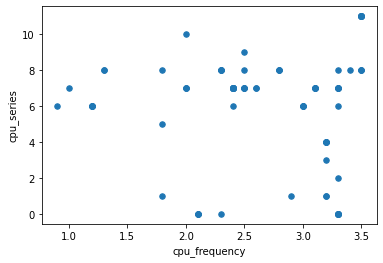

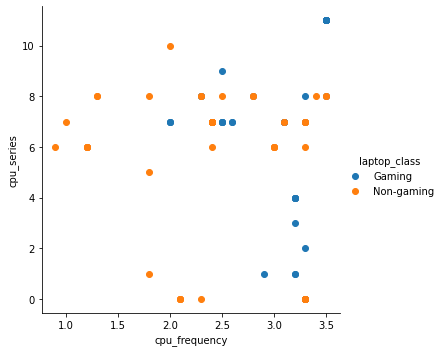

Number of test cases: 30
Number of correct answers: 18
Fraction: 0.6


0.6

In [18]:
make_classification('cpu_frequency', 'cpu_series', True, df_copy)

In [19]:
videocard_ram_class = []
videocard_frequency_class = []
videocard_series_class = []
videocard_core_class = []

series_core_class = []
ram_core_class = []
frequency_core_class = []
frequency_ram_class = []
frequency_series_class = []

def find_average(lst):
    sum = 0
    
    for num in lst:
        sum += num
    
    return sum / len(lst)


for i in range(100):
    videocard_ram_class.append(make_classification('videocard', 'RAM', False, df_copy))
    videocard_frequency_class.append(make_classification('videocard', 'cpu_frequency', False, df_copy))
    videocard_series_class.append(make_classification('videocard', 'cpu_series', False, df_copy))
    videocard_core_class.append(make_classification('videocard', 'core', False, df_copy))
    series_core_class.append(make_classification('cpu_series', 'core', False, df_copy))
    ram_core_class.append(make_classification('RAM', 'core', False, df_copy))
    frequency_core_class.append(make_classification('cpu_frequency', 'core', False, df_copy))
    frequency_ram_class.append(make_classification('cpu_frequency', 'RAM', False, df_copy))
    frequency_series_class.append(make_classification('cpu_frequency', 'cpu_series', False, df_copy))
    
print('Features: Videocard and RAM', find_average(videocard_ram_class))
print('Features: Videocard and CPU frequency', find_average(videocard_frequency_class))
print('Features: Videocard and CPU series', find_average(videocard_series_class))
print('Features: Videocard and Cores', find_average(videocard_core_class))

print('Features: CPU series and Cores', find_average(series_core_class))
print('Features: RAM series and Cores', find_average(ram_core_class))
print('Features: CPU frequency series and Cores', find_average(frequency_core_class))
print('Features: CPU frequency series and RAM', find_average(frequency_ram_class))
print('Features: CPU frequency series and CPU series', find_average(frequency_series_class))


Features: Videocard and RAM 0.7503333333333332
Features: Videocard and CPU frequency 0.8826666666666668
Features: Videocard and CPU series 0.8903333333333336
Features: Videocard and Cores 0.863333333333333
Features: CPU series and Cores 0.7403333333333335
Features: RAM series and Cores 0.7116666666666669
Features: CPU frequency series and Cores 0.805333333333333
Features: CPU frequency series and RAM 0.7310000000000001
Features: CPU frequency series and CPU series 0.7260000000000002


In [20]:
#We found that CPU characteristic + Videocard gives us the most accurate results

In [21]:
# Let's make another test. We will divide videocards to integrated and discrete
# Laptops with NGF RTX3050, NGF GTX 1650 and etc. are laptops with discrete videocards

In [22]:
df

,serie,cpu_manufacturer,core,cpu_frequency,cpu_series,memory_size,memory_type,RAM,resolution,matrix_type,videocard,weight,laptop_class,prices
0,Asus TUF Gaming F15,Intel,6.0,2.6,Intel Core i5,512.0,SSD,16.0,1920x1080 Full HD,IPS,NGF RTX3050,2.30,Gaming,579990
1,Huawei HUAWEI MateBook D15,Intel,2.0,3.0,Intel Core i3,256.0,SSD,8.0,1920x1080 Full HD,IPS,Integrated,1.62,Non-gaming,299990
2,Asus X515JA,Intel,4.0,1.0,Intel Core i5,512.0,SSD,8.0,1920x1080 Full HD,IPS,Integrated,1.80,Non-gaming,299990
3,Asus X515JA,Intel,2.0,1.2,Intel Core i3,256.0,SSD,8.0,1920x1080 Full HD,IPS,Integrated,1.80,Non-gaming,219990
4,Asus TUF Gaming F15,Intel,4.0,2.5,Intel Core i5,512.0,SSD,16.0,1920x1080 Full HD,IPS,NGF GTX 1650,2.30,Gaming,489990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Gigabyte U4 UD,Intel,4.0,2.5,Intel Core i7,512.0,SSD,16.0,1920x1080 Full HD,IPS,Integrated,1.00,Non-gaming,476390
93,Gigabyte AERO 16 KE5,Intel,14.0,2.3,Intel Core i7,1000.0,SSD,16.0,3840x2400 WQUXGA,IPS,NGF RTX 3060,1.80,Gaming,1317890
94,Gigabyte G7 KE,Intel,6.0,2.5,Intel Core i5,512.0,SSD,16.0,1920x1080 Full HD,IPS,NGF RTX 3060P,2.40,Gaming,649490
95,Gigabyte G7 KE,Intel,12.0,2.5,Intel Core i5,512.0,SSD,16.0,1920x1080 Full HD,IPS,NGF RTX 3060P,2.40,Gaming,719490


In [23]:
#Making a copy of original dataframe and divide Videocard values to Intergrated and Discrete
df_copy_2 = df.copy()

for i in range(0, len(df_copy_2['videocard'])):
    if df_copy_2['videocard'][i] != 'Integrated':
        df_copy_2['videocard'][i] = 'Discrete'
df_copy_2

,serie,cpu_manufacturer,core,cpu_frequency,cpu_series,memory_size,memory_type,RAM,resolution,matrix_type,videocard,weight,laptop_class,prices
0,Asus TUF Gaming F15,Intel,6.0,2.6,Intel Core i5,512.0,SSD,16.0,1920x1080 Full HD,IPS,Discrete,2.30,Gaming,579990
1,Huawei HUAWEI MateBook D15,Intel,2.0,3.0,Intel Core i3,256.0,SSD,8.0,1920x1080 Full HD,IPS,Integrated,1.62,Non-gaming,299990
2,Asus X515JA,Intel,4.0,1.0,Intel Core i5,512.0,SSD,8.0,1920x1080 Full HD,IPS,Integrated,1.80,Non-gaming,299990
3,Asus X515JA,Intel,2.0,1.2,Intel Core i3,256.0,SSD,8.0,1920x1080 Full HD,IPS,Integrated,1.80,Non-gaming,219990
4,Asus TUF Gaming F15,Intel,4.0,2.5,Intel Core i5,512.0,SSD,16.0,1920x1080 Full HD,IPS,Discrete,2.30,Gaming,489990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Gigabyte U4 UD,Intel,4.0,2.5,Intel Core i7,512.0,SSD,16.0,1920x1080 Full HD,IPS,Integrated,1.00,Non-gaming,476390
93,Gigabyte AERO 16 KE5,Intel,14.0,2.3,Intel Core i7,1000.0,SSD,16.0,3840x2400 WQUXGA,IPS,Discrete,1.80,Gaming,1317890
94,Gigabyte G7 KE,Intel,6.0,2.5,Intel Core i5,512.0,SSD,16.0,1920x1080 Full HD,IPS,Discrete,2.40,Gaming,649490
95,Gigabyte G7 KE,Intel,12.0,2.5,Intel Core i5,512.0,SSD,16.0,1920x1080 Full HD,IPS,Discrete,2.40,Gaming,719490


In [24]:
# We need to do label encoding

df_copy_2['videocard'] = le.fit_transform(df_copy_2['videocard'].values)
df_copy_2['cpu_series'] = le.fit_transform(df_copy_2['cpu_series'].values)
df_copy_2

,serie,cpu_manufacturer,core,cpu_frequency,cpu_series,memory_size,memory_type,RAM,resolution,matrix_type,videocard,weight,laptop_class,prices
0,Asus TUF Gaming F15,Intel,6.0,2.6,7,512.0,SSD,16.0,1920x1080 Full HD,IPS,0,2.30,Gaming,579990
1,Huawei HUAWEI MateBook D15,Intel,2.0,3.0,6,256.0,SSD,8.0,1920x1080 Full HD,IPS,1,1.62,Non-gaming,299990
2,Asus X515JA,Intel,4.0,1.0,7,512.0,SSD,8.0,1920x1080 Full HD,IPS,1,1.80,Non-gaming,299990
3,Asus X515JA,Intel,2.0,1.2,6,256.0,SSD,8.0,1920x1080 Full HD,IPS,1,1.80,Non-gaming,219990
4,Asus TUF Gaming F15,Intel,4.0,2.5,7,512.0,SSD,16.0,1920x1080 Full HD,IPS,0,2.30,Gaming,489990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Gigabyte U4 UD,Intel,4.0,2.5,8,512.0,SSD,16.0,1920x1080 Full HD,IPS,1,1.00,Non-gaming,476390
93,Gigabyte AERO 16 KE5,Intel,14.0,2.3,8,1000.0,SSD,16.0,3840x2400 WQUXGA,IPS,0,1.80,Gaming,1317890
94,Gigabyte G7 KE,Intel,6.0,2.5,7,512.0,SSD,16.0,1920x1080 Full HD,IPS,0,2.40,Gaming,649490
95,Gigabyte G7 KE,Intel,12.0,2.5,7,512.0,SSD,16.0,1920x1080 Full HD,IPS,0,2.40,Gaming,719490


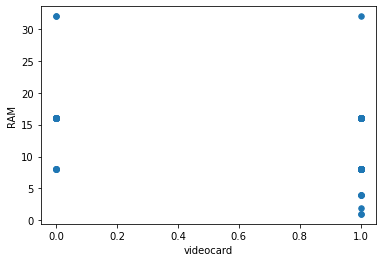

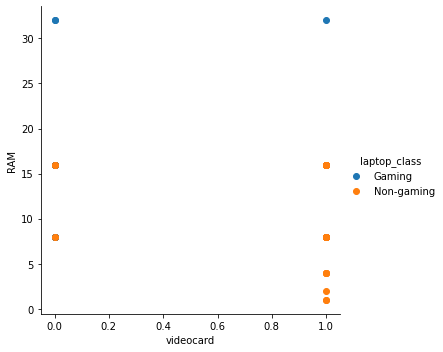

Number of test cases: 30
Number of correct answers: 25
Fraction: 0.8333333333333334


0.8333333333333334

In [25]:
make_classification('videocard', 'RAM', True, df_copy_2)

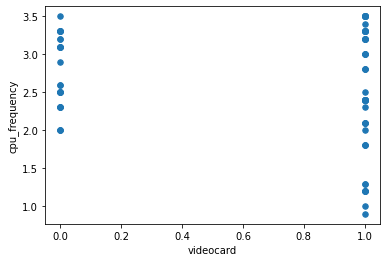

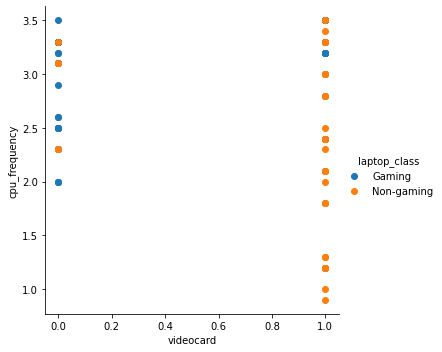

Number of test cases: 30
Number of correct answers: 27
Fraction: 0.9


0.9

In [26]:
make_classification('videocard', 'cpu_frequency', True, df_copy_2)

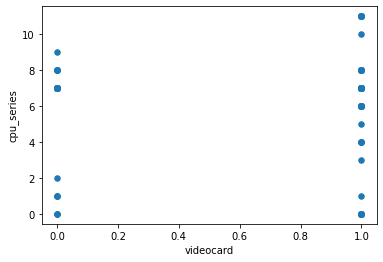

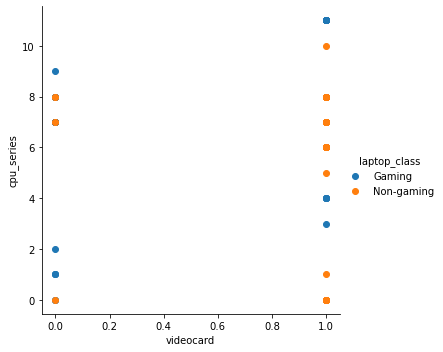

Number of test cases: 30
Number of correct answers: 27
Fraction: 0.9


0.9

In [27]:
make_classification('videocard', 'cpu_series', True, df_copy_2)

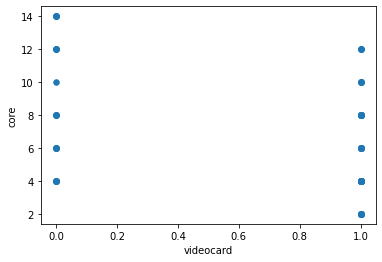

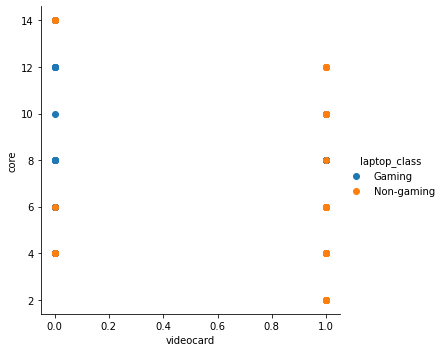

Number of test cases: 30
Number of correct answers: 25
Fraction: 0.8333333333333334


0.8333333333333334

In [30]:
make_classification('videocard', 'core', True, df_copy_2)

In [33]:
videocard_ram_class = []
videocard_frequency_class = []
videocard_series_class = []
videocard_core_class = []

def find_average(lst):
    sum = 0
    
    for num in lst:
        sum += num
    
    return sum / len(lst)


for i in range(100):
    videocard_ram_class.append(make_classification('videocard', 'RAM', False, df_copy_2))
    videocard_frequency_class.append(make_classification('videocard', 'cpu_frequency', False, df_copy_2))
    videocard_series_class.append(make_classification('videocard', 'cpu_series', False, df_copy_2))
    videocard_core_class.append(make_classification('videocard', 'core', False, df_copy_2))
    
print('Features: Videocard and RAM', find_average(videocard_ram_class))
print('Features: Videocard and CPU frequency', find_average(videocard_frequency_class))
print('Features: Videocard and CPU series', find_average(videocard_series_class))
print('Features: Videocard and Cores', find_average(videocard_core_class))

Features: Videocard and RAM 0.7456666666666665
Features: Videocard and CPU frequency 0.8886666666666665
Features: Videocard and CPU series 0.9063333333333332
Features: Videocard and Cores 0.8789999999999997


In [ ]:
# Wen can see that results are slightly better in some cases. The biggest difference was 
# shown by the processor series and videocard